# Mall Customer Segmentation


In [50]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from warnings import filterwarnings 
filterwarnings('ignore')

# Plot style and random state
sns.set(style="whitegrid")
RND = 42

# Understanding Dataset

In [51]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [53]:
df.shape

(200, 5)

In [54]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [55]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Data Cleaning

In [56]:
# Removing null values if it is found
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [57]:
# Removing dublicates values if it is found
df.duplicated().sum()

0

# Handle Outliers


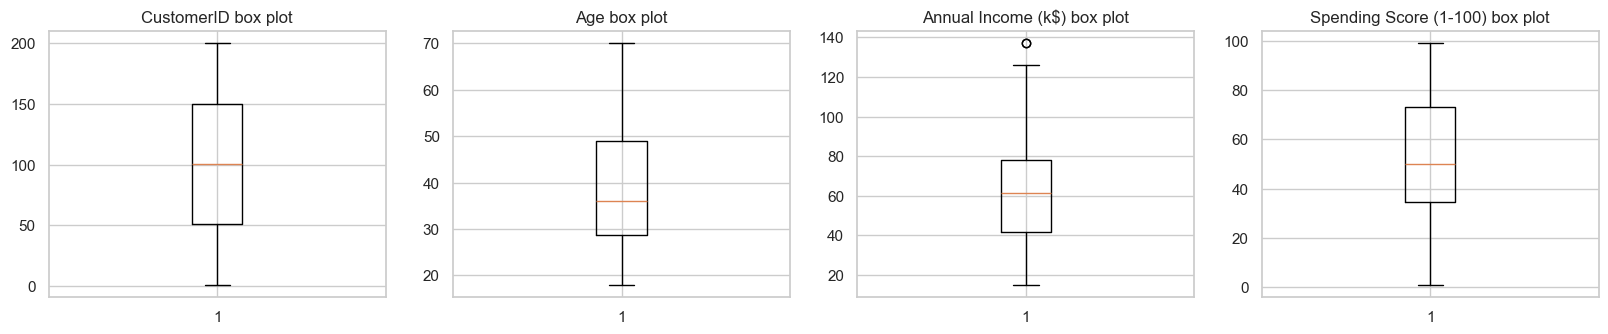

In [58]:
Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i, col in enumerate(Numeric_columns):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col} box plot")
plt.show()

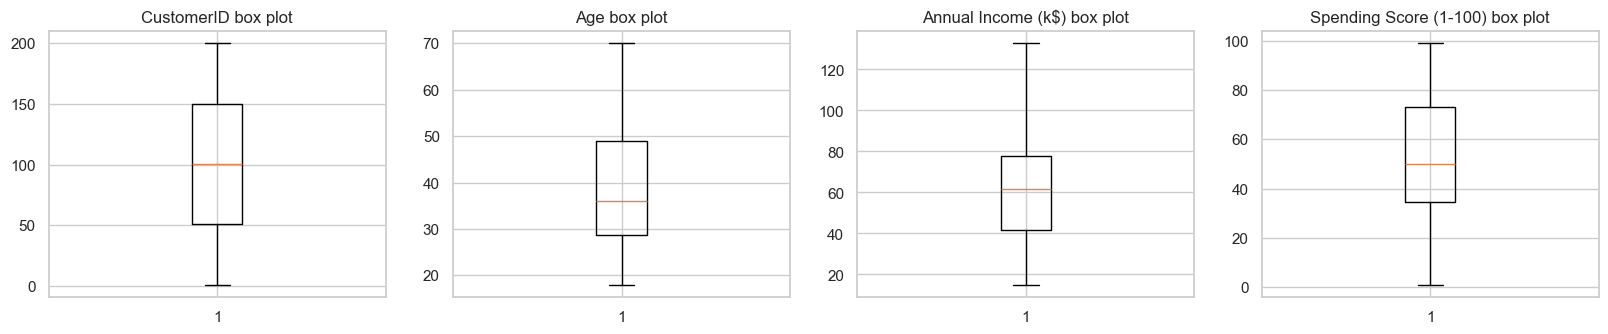

In [59]:

for col in Numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    Upper_Fennse = Q3 + (1.5*IQR)
    lower_fennse = Q1 - (1.5*IQR)
    Low_Outlier = df[df[col] < lower_fennse][col].values
    Up_Outlier = df[df[col] > Upper_Fennse][col].values
    df[col].replace(Low_Outlier , lower_fennse , inplace=True)
    df[col].replace(Up_Outlier , Upper_Fennse , inplace=True)

Numeric_columns = df.select_dtypes('number').columns
Numeric_columns
plt.figure(figsize=(20,20))
for i, col in enumerate(Numeric_columns):
    plt.subplot(5, 4, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col} box plot")
plt.show()


# Encoding

In [60]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [61]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15.0,39
1,2,1,21,15.0,81
2,3,0,20,16.0,6
3,4,0,23,16.0,77
4,5,0,31,17.0,40


# Select Features for Clustering


In [62]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

In [63]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine Optimal Number of Clusters (Elbow & Silhouette)


In [64]:
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=RND, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

Text(0.5, 1.0, 'Elbow Method')

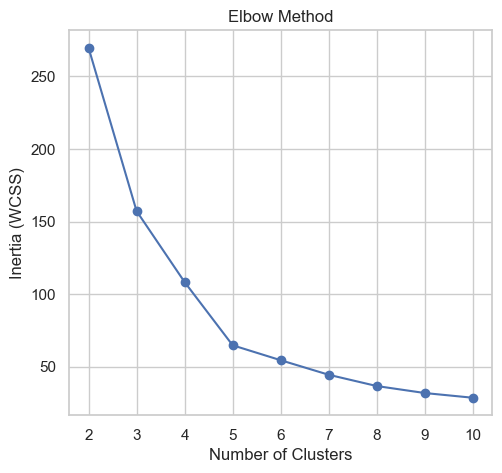

In [65]:
# Plot Elbow
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(K, inertia, marker="o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (WCSS)")
plt.title("Elbow Method")

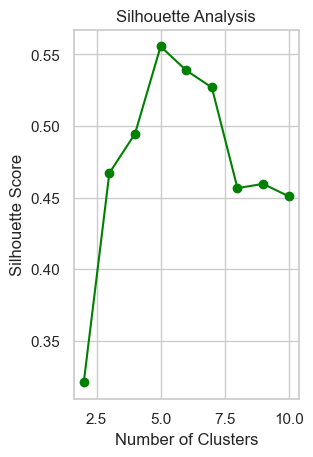

In [66]:
# Plot Silhouette
plt.subplot(1,2,2)
plt.plot(K, silhouette, marker="o", color="green")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")

plt.show()

# Apply K-Means with Optimal Clusters


In [67]:
kmeans = KMeans(n_clusters=5, random_state=RND, n_init=10)  # adjust based on elbow/silhouette
clusters = kmeans.fit_predict(X_scaled)

df["Cluster"] = clusters

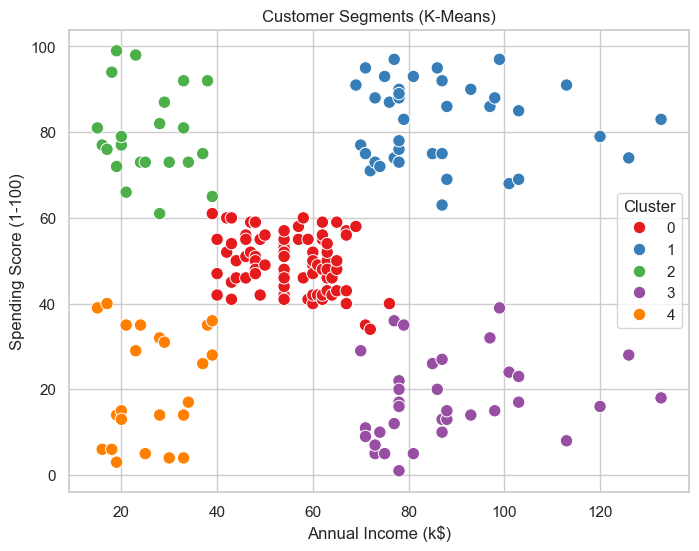

In [68]:
#Visualize Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"], 
    y=df["Spending Score (1-100)"], 
    hue=df["Cluster"], 
    palette="Set1", 
    s=80
)
plt.title("Customer Segments (K-Means)")
plt.show()

In [69]:
#Analyze Average Spending per Cluster
cluster_summary = df.groupby("Cluster")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.429487               82.128205
2                 25.727273               79.363636
3                 88.078571               17.114286
4                 26.304348               20.913043



# ===============================
# Bonus: Try DBSCAN
# ===============================

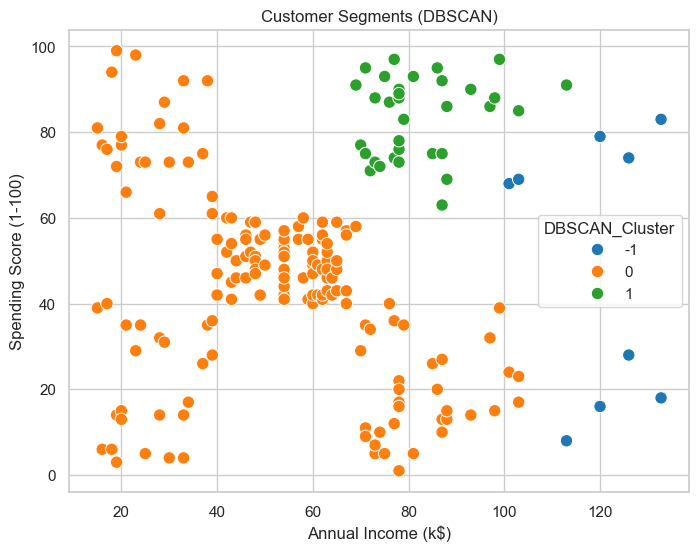

In [70]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

df["DBSCAN_Cluster"] = dbscan_labels

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df["Annual Income (k$)"], 
    y=df["Spending Score (1-100)"], 
    hue=df["DBSCAN_Cluster"], 
    palette="tab10", 
    s=80
)
plt.title("Customer Segments (DBSCAN)")
plt.show()